In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
tf.random.set_seed(100)

In [2]:
import bs4
import os
import numpy as np
import pandas as pd 
path="C:/road_signs/annotations"
content=[]

for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    finalpath= os.path.join(path, filename)

    infile = open(finalpath,"r")
    contents = infile.read()
    soup = bs4.BeautifulSoup(contents,'xml')
    class_name=soup.find_all("name")
    name = soup.find_all('filename')
    width= soup.find_all("width")
    height=soup.find_all("height")
    depth=soup.find_all("depth")
    
    ls=[]
    for x in range(0,len(name)):
        for i in name:
            name=name[x].get_text()
            path_name="images/"+name
        class_name=class_name[x].get_text()
        height=int(height[x].get_text())
        depth=int(depth[x].get_text())
        width=int(width[x].get_text())
        f_name=filename
        ls.extend([f_name,path_name,width,height,depth,class_name])

    content.append(ls)

import pandas as pd
new_cols = ["f_name","path_name", "width","height","depth","class_name"]
data = pd.DataFrame(data = content, columns = new_cols)
data.class_name=data.class_name.map({'trafficlight':1, 'speedlimit':2, 'crosswalk':3, 'stop':4})
data.head()


,f_name,path_name,width,height,depth,class_name
0,road0.xml,images/road0.png,267,400,3,1
1,road1.xml,images/road1.png,400,283,3,1
2,road10.xml,images/road10.png,400,267,3,1
3,road100.xml,images/road100.png,400,385,3,2
4,road101.xml,images/road101.png,400,200,3,2


In [3]:

data1=[]
from PIL import Image,ImageTk
import numpy
for a in data.path_name.values:
    image = Image.open("C:/road_signs/"+a).convert("RGB")
    image=image.resize((224,224),Image.ANTIALIAS)
    image=numpy.array(image.getdata()).reshape(224,224,3)
    data1.append(image)

In [4]:
X=np.array(data1)

y=np.array(data.iloc[:,-1],dtype=int)



from keras.utils.all_utils import to_categorical
from sklearn.model_selection import train_test_split
c=to_categorical(y,dtype=int)
Y=c[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=787)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


(701, 224, 224, 3) (176, 224, 224, 3) (701, 4) (176, 4)


In [5]:
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
11/11 [==============================] - 14s 529ms/step - loss: 42.2948 - acc: 0.4779 - val_loss: 0.8505 - val_acc: 0.7500
Epoch 2/30
11/11 [==============================] - 2s 172ms/step - loss: 0.9898 - acc: 0.7718 - val_loss: 0.8194 - val_acc: 0.7670
Epoch 3/30
11/11 [==============================] - 2s 165ms/step - loss: 0.7970 - acc: 0.7775 - val_loss: 0.7186 - val_acc: 0.7784
Epoch 4/30
11/11 [==============================] - 2s 165ms/step - loss: 0.7174 - acc: 0.7917 - val_loss: 0.7324 - val_acc: 0.7841
Epoch 5/30
11/11 [==============================] - 2s 152ms/step - loss: 0.5919 - acc: 0.8374 - val_loss: 0.7775 - val_acc: 0.8068
Epoch 6/30
11/11 [==============================] - 2s 154ms/step - loss: 0.5345 - acc: 0.8545 - val_loss: 0.6228 - val_acc: 0.8011
Epoch 7/30
11/11 [==============================] - 2s 159ms/step - loss: 0.4506 - acc: 0.8602 - val_loss: 0.8472 - val_acc: 0.8068
Epoch 8/30
11/11 [==============================] - 2s 154ms/step - loss: 

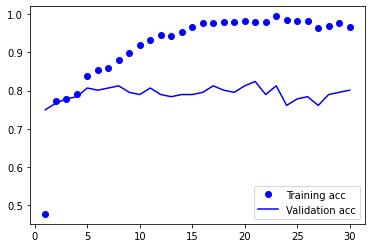

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.legend()

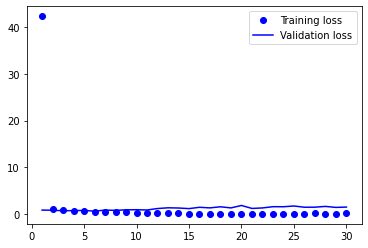

In [7]:
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.legend()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

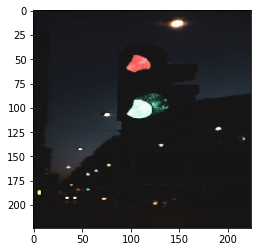

In [44]:
img_path = "C:/road_signs/images/road0.png"
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])

In [45]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input,outputs = layer_outputs)

In [46]:
activations = activation_model.predict(img_tensor)

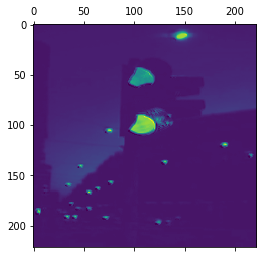

In [48]:
first_layer_activations = activations[0]
plt.matshow(first_layer_activations[0,:,:,4],cmap = 'viridis')

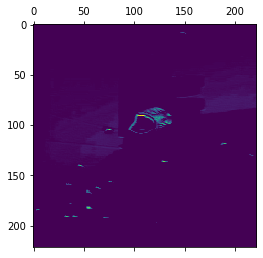

In [49]:
plt.matshow(first_layer_activations[0,:,:,7],cmap = 'viridis')

C:\Users\Denis\AppData\Local\Temp/ipykernel_9988/2392521036.py:18: RuntimeWarning: invalid value encountered in true_divide
  chanel_image /= chanel_image.std()


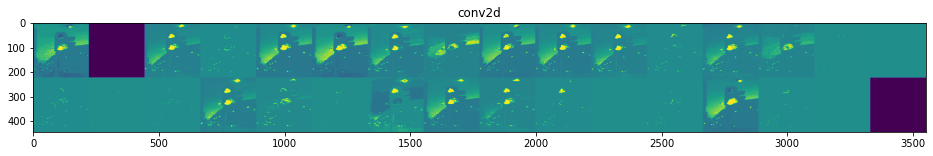

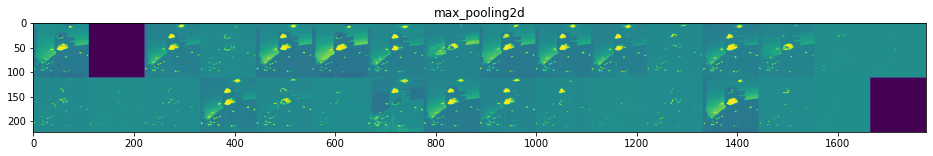

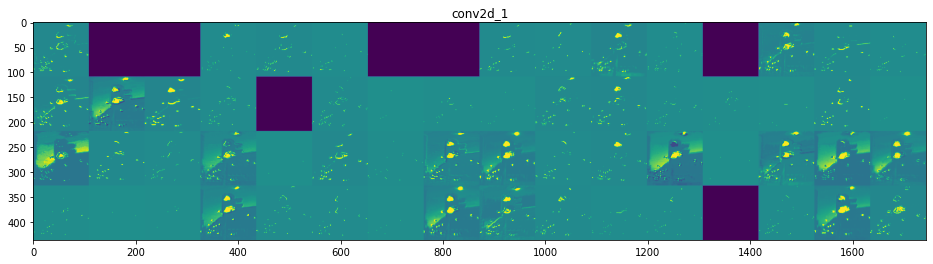

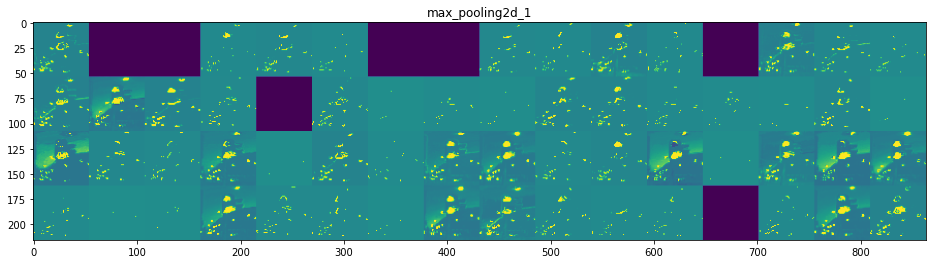

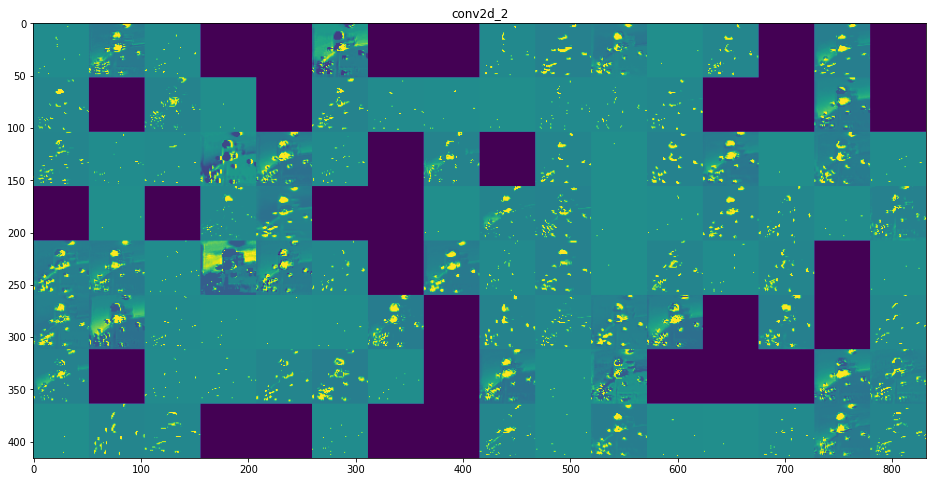

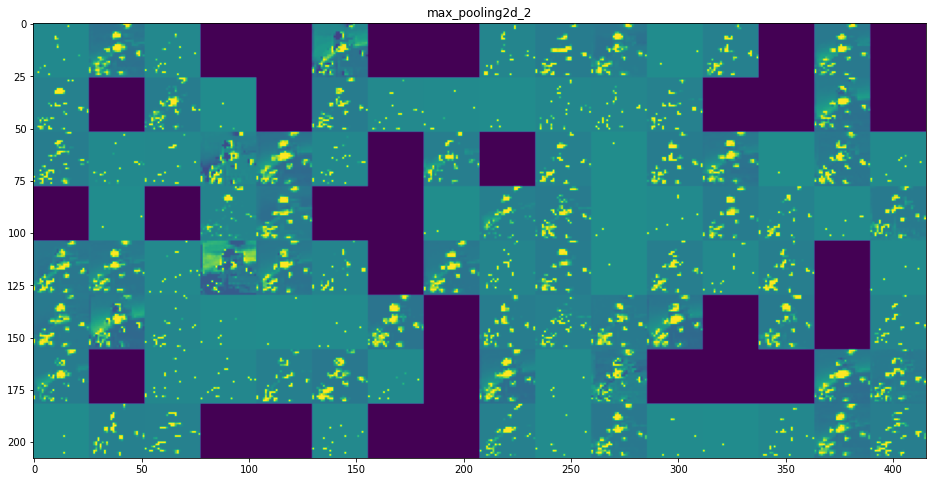

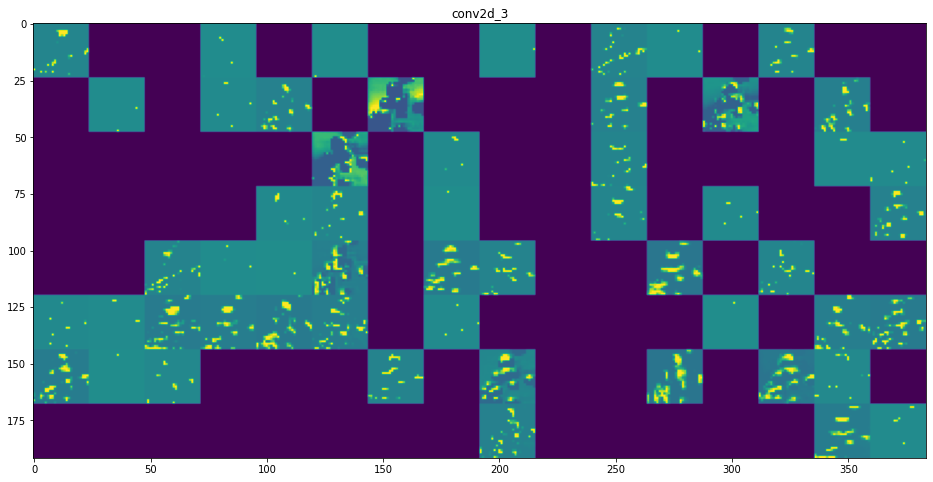

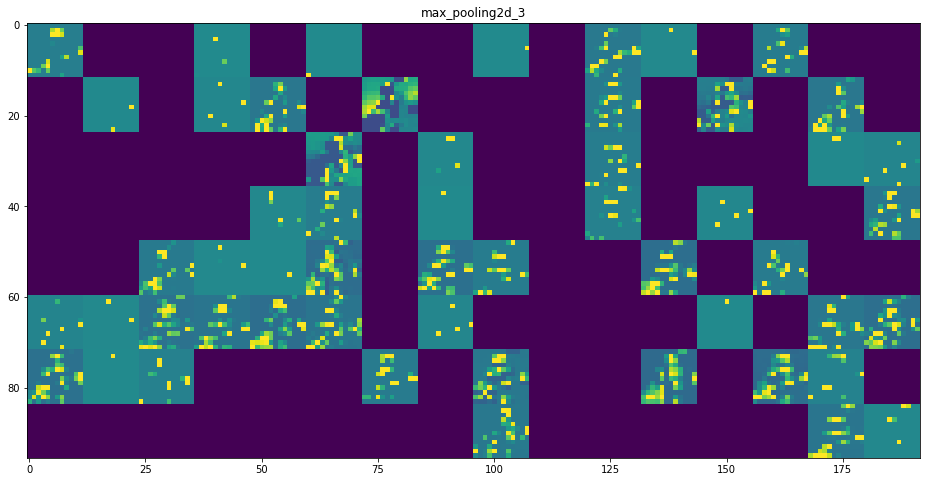

In [52]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols,images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            chanel_image = layer_activation[0,:,:,col*images_per_row+row]
            chanel_image -= chanel_image.mean()
            chanel_image /= chanel_image.std()
            chanel_image *= 64
            chanel_image +=128
            chanel_image = np.clip(chanel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = chanel_image
    scale = 1. / size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap = 'viridis')